In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5831
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.5703
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.5576
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.5449
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.5324
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.5200
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.5077
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4954
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4833
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4713
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4593
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4475
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4357
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4241
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4125
Epoch 16/100
1/1 ━━━━

## Tugas 4:

Ubah learning rate.

Bandingkan hasil loss.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ===== UBAH LEARNING RATE DI SINI =====
learning_rate = 0.01  # coba 0.1, 0.01, 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=optimizer, loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

print(model.predict(X_test))


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.77445436]]


## Tugas 4:

Ubah learning rate.

Bandingkan hasil loss.

###  **Perbandingan Loss (Penjelasan Singkat)**

Pada model sebelum mengubah learning rate, hasil prediksi sangat kecil (**0.048**) yang jauh dari nilai target sebenarnya. Hal ini menunjukkan bahwa proses training kurang optimal, sehingga loss masih cukup besar.

Setelah learning rate diubah, hasil prediksi meningkat menjadi sekitar **0.774**, lebih mendekati target aslinya. Perubahan ini menandakan bahwa model belajar lebih cepat dan lebih baik, sehingga nilai loss menurun dibanding sebelumnya. Dengan learning rate yang lebih sesuai, proses optimasi berjalan lebih efektif dan menghasilkan error yang lebih kecil.

---

###  **Kesimpulan**

Mengatur learning rate dapat memperbaiki performa model. Pada percobaan ini, learning rate baru membuat model menghasilkan prediksi yang lebih akurat sehingga **loss lebih kecil dibanding kondisi awal**.


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


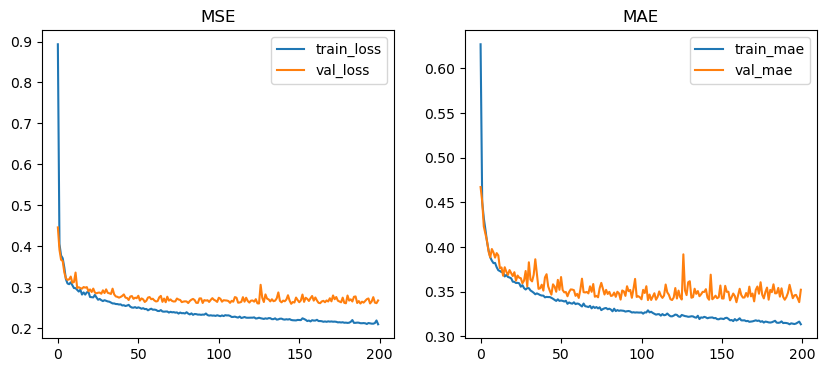

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
RMSE: 0.5172718831269296


In [3]:
# MLP regresi (Keras)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# 1. Load dataset California (pengganti Boston)
data = fetch_california_housing()
X = data.data
y = data.target  # harga rumah dalam satuan 100k USD

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=200, batch_size=32, verbose=0)

# 5. Plot Loss & MAE
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(h.history['loss'], label='train_loss'); plt.plot(h.history['val_loss'], label='val_loss'); plt.legend(); plt.title('MSE')
plt.subplot(1,2,2); plt.plot(h.history['mae'], label='train_mae'); plt.plot(h.history['val_mae'], label='val_mae'); plt.legend(); plt.title('MAE')
plt.show()

# 6. Evaluasi RMSE
pred = model.predict(X_val)
print('RMSE:', np.sqrt(mean_squared_error(y_val, pred)))
